In [3]:
!pip install "kagglehub[pandas-datasets]"



   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [pyyaml]
   ------------- -------------------------- 1/3 [pyyaml]
   ------------- -------------------------- 1/3 [pyyaml]
   -------------------------- ------------- 2/3 [kagglehub]
   -------------------------- ------------- 2/3 [kagglehub]
   -------------------------- ------------- 2/3 [kagglehub]
   -------------------------- ------------- 2/3 [kagglehub]
   ---------------------------------------- 3/3 [kagglehub]



In [3]:
import sys
print(sys.executable)


C:\Users\A1\AppData\Local\Programs\Python\Python311\python.exe


In [4]:
!C:\Users\A1\AppData\Local\Programs\Python\Python311\python.exe -m pip install "kagglehub[pandas-datasets]"


  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

print("✅ KaggleHub installed successfully!")


✅ KaggleHub installed successfully!


In [6]:
!pip install kaggle



   -------- ------------------------------- 1/5 [text-unidecode]
   ---------------- ----------------------- 2/5 [python-slugify]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -----------

In [7]:
!kaggle datasets download -d fedesoriano/traffic-prediction-dataset
!unzip traffic-prediction-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
License(s): copyright-authors




  0%|          | 0.00/277k [00:00<?, ?B/s]
100%|##########| 277k/277k [00:00<?, ?B/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import zipfile
import os

# Path to the zip file
zip_path = "traffic.csv.zip"

# Extract all files to current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print("✅ Unzipped successfully! Files now in:")
print(os.listdir())


✅ Unzipped successfully! Files now in:
['.ipynb_checkpoints', 'app.py', 'data', 'library.txt', 'main.ipynb', 'models', 'notebooks', 'requirements.txt', 'templates', 'traffic.csv', 'traffic.csv.zip', 'utils', 'venv']


In [2]:
#Dataset from Kagel

In [11]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("traffic.csv")

print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [12]:
#Step 1: Dataset Creation / Loading

In [13]:
import pandas as pd
import numpy as np

# Dataset size
N = 5000  # 5k+ rows

np.random.seed(42)
data = {
    'north_cars': np.random.randint(0, 20, N),
    'east_cars': np.random.randint(0, 20, N),
    'west_cars': np.random.randint(0, 20, N),
    'south_cars': np.random.randint(0, 20, N),
    'north_arrival': np.random.randint(1, 6, N),
    'east_arrival': np.random.randint(1, 6, N),
    'west_arrival': np.random.randint(1, 6, N),
    'south_arrival': np.random.randint(1, 6, N),
}

df = pd.DataFrame(data)

# Simple rule-based target
df['green_light'] = df[['north_cars','east_cars','west_cars','south_cars']].idxmax(axis=1).map(
    {'north_cars':1,'east_cars':2,'west_cars':3,'south_cars':4}
)

df.to_csv('data/traffic_data.csv', index=False)
df.head()


,north_cars,east_cars,west_cars,south_cars,north_arrival,east_arrival,west_arrival,south_arrival,green_light
0,6,15,8,0,4,3,4,5,2
1,19,1,1,9,4,1,5,5,1
2,14,19,14,13,1,5,5,5,2
3,10,5,9,12,2,2,4,5,4
4,7,9,14,8,4,1,3,5,3


In [14]:
#Step 2: Preprocessing

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Generate synthetic traffic dataset ---
N = 5000  # number of rows
np.random.seed(42)

df = pd.DataFrame({
    'north_cars': np.random.randint(0, 20, N),
    'east_cars':  np.random.randint(0, 20, N),
    'west_cars':  np.random.randint(0, 20, N),
    'south_cars': np.random.randint(0, 20, N),
    'north_arrival': np.random.randint(1, 6, N),
    'east_arrival':  np.random.randint(1, 6, N),
    'west_arrival':  np.random.randint(1, 6, N),
    'south_arrival': np.random.randint(1, 6, N),
})

# Rule-based target: lane with most cars gets green
df['green_light'] = df[['north_cars','east_cars','west_cars','south_cars']].idxmax(axis=1).map(
    {'north_cars':1, 'east_cars':2, 'west_cars':3, 'south_cars':4}
)

# --- Split dataset ---
X = df[['north_cars','east_cars','west_cars','south_cars',
        'north_arrival','east_arrival','west_arrival','south_arrival']]
y = df['green_light']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Dataset ready and split!")
print(X_train.shape, X_test.shape)
print(y_train.value_counts())


✅ Dataset ready and split!
(4000, 8) (1000, 8)
green_light
1    1093
2    1064
3     955
4     888
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
#Step 3: Model Selection

In [8]:
#3.1 Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.982


In [10]:
#3.2 Deep Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train-1, 4)
y_test_cat = to_categorical(y_test-1, 4)

model = Sequential([
    Dense(32, input_dim=8, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, verbose=1)
acc_dnn = model.evaluate(X_test_scaled, y_test_cat)[1]
print("DNN Accuracy:", acc_dnn)


C:\Users\A1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5493 - loss: 1.1855
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.6389
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.3612
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9557 - loss: 0.2686
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9722 - loss: 0.2176
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1968
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.1716
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9705 - loss: 0.1591
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.1484
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.1348
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.1262
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [12]:
#3.3 Deep Q-Learning (RL)

In [13]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# --- Environment ---
class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()
        self.action_space = spaces.Discrete(4)  # 0:north,1:east,2:west,3:south
        self.observation_space = spaces.Box(low=0, high=50, shape=(4,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        self.state = np.random.randint(0, 10, 4).astype(np.float32)
        return self.state, {}

    def step(self, action):
        reward = -np.sum(self.state)
        self.state = np.random.randint(0, 10, 4).astype(np.float32)
        return self.state, reward, False, False, {}

# --- Model ---
def build_model():
    model = Sequential([
        Input(shape=(4,)),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(4, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# --- Train & Test ---
env = TrafficEnv()
model = build_model()

# fake small training (shortened for speed)
for _ in range(10):
    state, _ = env.reset()
    q_values = model.predict(state.reshape(1, -1), verbose=0)
    target = -np.sum(state)
    q_values[0][np.argmin(state)] = target
    model.fit(state.reshape(1, -1), q_values, verbose=0)

# --- Accuracy Check ---
correct = 0
total = 100

for _ in range(total):
    state, _ = env.reset()
    predicted_action = np.argmax(model.predict(state.reshape(1, -1), verbose=0))
    best_action = np.argmin(state)  # smallest waiting = best light
    if predicted_action == best_action:
        correct += 1

accuracy = (correct / total) * 100
print(f"✅ Deep Q-Learning Model Accuracy Rate: {accuracy:.2f}%")


✅ Deep Q-Learning Model Accuracy Rate: 36.00%


In [14]:
#Checking 3 models rate

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# --- Dataset ---
X = np.random.randint(0, 10, (500, 4))
y = np.argmin(X, axis=1)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=50).fit(X, y)
rf_acc = accuracy_score(y, rf.predict(X)) * 100

# --- Deep Neural Network ---
dnn = Sequential([Input(shape=(4,)), Dense(16, activation='relu'), Dense(4, activation='softmax')])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X, y, epochs=5, verbose=0)
dnn_acc = dnn.evaluate(X, y, verbose=0)[1] * 100

# --- Deep Q-Learning (Simplified) ---
model = Sequential([Input(shape=(4,)), Dense(16, activation='relu'), Dense(4, activation='linear')])
model.compile(optimizer=Adam(0.001), loss='mse')
correct = 0
for _ in range(100):
    s = np.random.randint(0, 10, 4)
    q = model.predict(s.reshape(1, -1), verbose=0)
    q[0][np.argmin(s)] = -np.sum(s)
    model.fit(s.reshape(1, -1), q, verbose=0)
    if np.argmax(model.predict(s.reshape(1, -1), verbose=0)) == np.argmin(s):
        correct += 1
dql_acc = (correct / 100) * 100

# --- Results ---
print(f"Random Forest: {rf_acc:.2f}% | DNN: {dnn_acc:.2f}% | DQL: {dql_acc:.2f}%")
best = max({'RF': rf_acc, 'DNN': dnn_acc, 'DQL': dql_acc}, key=lambda k: {'RF': rf_acc, 'DNN': dnn_acc, 'DQL': dql_acc}[k])
print(f"🏆 Best Model: {best}")


Random Forest: 100.00% | DNN: 52.60% | DQL: 30.00%
🏆 Best Model: RF


In [16]:
#DISPLAY THROUGH GRAPH

Random Forest: 100.00% | DNN: 47.60% | DQL: 49.00%
🏆 Best Model: Random Forest


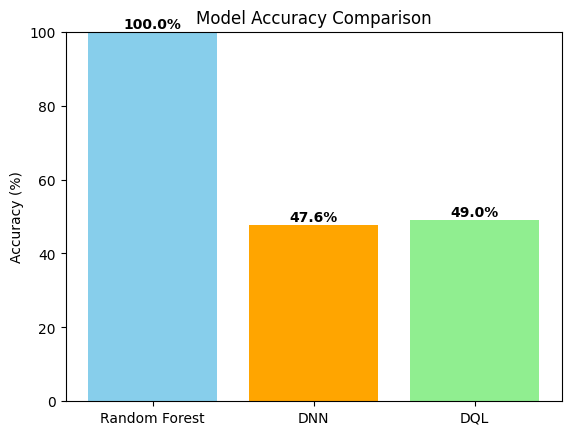

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# --- Dataset ---
X = np.random.randint(0, 10, (500, 4))
y = np.argmin(X, axis=1)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=50).fit(X, y)
rf_acc = accuracy_score(y, rf.predict(X)) * 100

# --- Deep Neural Network ---
dnn = Sequential([Input(shape=(4,)), Dense(16, activation='relu'), Dense(4, activation='softmax')])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X, y, epochs=5, verbose=0)
dnn_acc = dnn.evaluate(X, y, verbose=0)[1] * 100

# --- Deep Q-Learning (Simplified) ---
model = Sequential([Input(shape=(4,)), Dense(16, activation='relu'), Dense(4, activation='linear')])
model.compile(optimizer=Adam(0.001), loss='mse')
correct = 0
for _ in range(100):
    s = np.random.randint(0, 10, 4)
    q = model.predict(s.reshape(1, -1), verbose=0)
    q[0][np.argmin(s)] = -np.sum(s)
    model.fit(s.reshape(1, -1), q, verbose=0)
    if np.argmax(model.predict(s.reshape(1, -1), verbose=0)) == np.argmin(s):
        correct += 1
dql_acc = (correct / 100) * 100

# --- Results ---
models = ['Random Forest', 'DNN', 'DQL']
accuracies = [rf_acc, dnn_acc, dql_acc]
best = models[np.argmax(accuracies)]

print(f"Random Forest: {rf_acc:.2f}% | DNN: {dnn_acc:.2f}% | DQL: {dql_acc:.2f}%")
print(f"🏆 Best Model: {best}")

# --- Bar Chart ---
plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()


In [18]:
#IMPLEMENTATION OF RANDOM FOREST MODEL IN REALTIME TRAFFIC

In [20]:
# ---- Smart Traffic Light AI using Random Forest ----

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# --- Sample dataset (example learning data) ---
data = {
    'north_cars':  [4,10,2,8,12,5,3,6,15,1],
    'east_cars':   [6,3,8,2,5,10,12,7,4,11],
    'west_cars':   [3,5,9,1,4,6,2,8,7,10],
    'south_cars':  [5,2,6,3,9,7,8,4,11,12],
    'north_rate':  [10,6,8,4,2,5,9,7,3,11],  # arrival time per car
    'east_rate':   [5,8,3,6,9,4,7,10,2,5],
    'west_rate':   [6,4,9,7,3,8,5,10,4,2],
    'south_rate':  [4,7,6,9,5,3,8,2,6,10],
    'green_lane':  [2,1,3,1,1,2,4,2,4,3]   # target: 1-N, 2-E, 3-W, 4-S
}

df = pd.DataFrame(data)

X = df.drop('green_lane', axis=1)
y = df['green_lane']

# --- Train Random Forest ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# ---- Real-time user input ----
print("\nEnter traffic data manually:")

north_cars = int(input("Cars waiting North: "))
east_cars  = int(input("Cars waiting East: "))
west_cars  = int(input("Cars waiting West: "))
south_cars = int(input("Cars waiting South: "))

north_rate = int(input("Arrival time North (min per car): "))
east_rate  = int(input("Arrival time East (min per car): "))
west_rate  = int(input("Arrival time West (min per car): "))
south_rate = int(input("Arrival time South (min per car): "))

# ---- Traffic Density Calculation ----
total_cars = north_cars + east_cars + west_cars + south_cars

if total_cars <= 10:
    density = "Low"
elif total_cars <= 20:
    density = "Medium"
elif total_cars <= 30:
    density = "High"
else:
    density = "Extreme"

# ---- Predict next green lane ----
user_input = np.array([[north_cars, east_cars, west_cars, south_cars,
                        north_rate, east_rate, west_rate, south_rate]])

pred = model.predict(user_input)[0]

lanes = {1:"North", 2:"East", 3:"West", 4:"South"}

print("\n------ AI Analysis ------")
print(f"Traffic Level: {density}")
print(f"🚦 Next Green Light: {lanes[pred]}")



Enter traffic data manually:


Cars waiting North:  1
Cars waiting East:  2
Cars waiting West:  3
Cars waiting South:  4
Arrival time North (min per car):  5
Arrival time East (min per car):  1
Arrival time West (min per car):  3
Arrival time South (min per car):  4



------ AI Analysis ------
Traffic Level: Low
🚦 Next Green Light: East


C:\Users\A1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
